## Биномиальный критерий для доли

In [1]:
import numpy as np
from scipy import stats

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Shaker, not stirred

Джеймс Бонд говорит, что предпочитает мартини взболтанным, но не смешанным. Проведем слепой тест (blind test): n раз предложим ему пару напитков и выясним, какой из двух он предпочитает. Получаем:
- **выборка**: бинарный вектор длины n, где 1 - взболтанный напиток, 0 - смешанный;
- **гипотеза H0**: Джеймс Бонд не различает 2 вида напитков и выбирает наугад;
- **Статистика T**: количество единиц в выборке.

Если нулевая гипотеза справедлива и Джеймс Бонд действительно выбирает наугад, то мы можем с одинаковой вероятностью получить любой из $2^n$ бинарных векторов длины $n$. 

Мы могли бы перебрать все такие векторы, посчитать на каждом значение статистики $T$ и получить таким образом её нулевое распределение. Но в данном случае этот этап можно пропустить: мы имеем дело с выборкой, состоящей из 0 и 1, то есть, из распределения Бернулли $Ber(p)$. Нулевая гипотеза выбора наугад соответствует значению $p=\frac1{2}$, то есть, в каждом эксперименте вероятность выбора взболтанного мартини равна $\frac1{2}$. Сумма $n$ одинаково распределённых бернуллиевских случайных величин с параметром $p$ имеет биномиальное распределение $Bin(n, p)$. Следовательно, нулевое распределение статистики $T$ — $Bin\left(n, \frac1{2}\right)$.

Пусть n = 16

In [3]:
n = 16
F_H0 = stats.binom(n, 0.5)

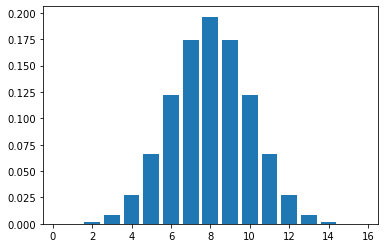

In [4]:
x = np.linspace(0, 16, 17)

pylab.bar(x, F_H0.pmf(x), align='center')
xlim(-.5, 16.5)
pylab.show()

## Односторонняя альтернатива

**гипотеза $H_1$:** Джеймс Бонд предпочитает взболтанный мартини.

При такой альтернативе более вероятны большие значения статистики; при расчёте достигаемого уровня значимости будем суммировать высоту столбиков в правом хвосте распределения.

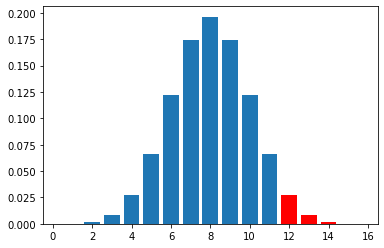

In [5]:
pylab.bar(x, F_H0.pmf(x), align = 'center')
pylab.bar(np.linspace(12,16,5), F_H0.pmf(np.linspace(12,16,5)), align = 'center', color='red')
xlim(-0.5, 16.5) 
pylab.show()

In [1]:
stats.binom_test(12, 16, 0.5, alternative = 'greater')

NameError: name 'stats' is not defined

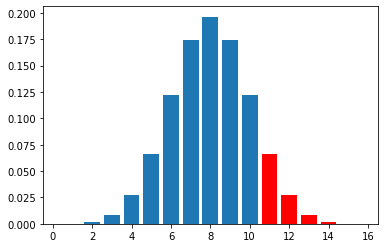

In [7]:
pylab.bar(x, F_H0.pmf(x), align = 'center')
pylab.bar(np.linspace(11,16,6), F_H0.pmf(np.linspace(11,16,6)), align = 'center', color='red')
xlim(-0.5, 16.5) 
pylab.show()

In [8]:
stats.binom_test(11, 16, 0.5, alternative = 'greater')

0.10505676269531246

## Двусторонняя альтернатива

**гипотеза $H_1$:** Джеймс Бонд предпочитает какой-то определённый вид мартини.

При такой альтернативе более вероятны очень большие и очень маленькие значения статистики; при расчёте достигаемого уровня значимости будем суммировать высоту столбиков в правом и левом хвостах распределения.

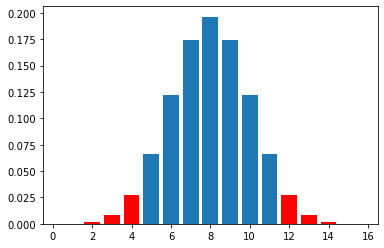

In [9]:
pylab.bar(x, F_H0.pmf(x), align = 'center')
pylab.bar(np.linspace(12,16,5), F_H0.pmf(np.linspace(12,16,5)), align = 'center', color='red')
pylab.bar(np.linspace(0,4,5), F_H0.pmf(np.linspace(0,4,5)), align = 'center', color='red')
xlim(-0.5, 16.5) 
pylab.show()

In [10]:
stats.binom_test(12, 16, 0.5, alternative = 'two-sided')

0.076812744140625

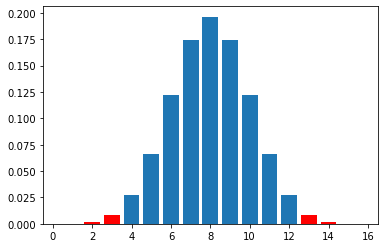

In [11]:
pylab.bar(x, F_H0.pmf(x), align = 'center')
pylab.bar(np.linspace(13,16,4), F_H0.pmf(np.linspace(13,16,4)), align = 'center', color='red')
pylab.bar(np.linspace(0,3,4), F_H0.pmf(np.linspace(0,3,4)), align = 'center', color='red')
xlim(-0.5, 16.5) 
pylab.show()

In [12]:
stats.binom_test(13, 16, 0.5, alternative = 'two-sided')

0.021270751953125

# Критерий согласия Пирсона ( $\chi^2$)

## Исчерпанная рождаемость

Исчерпанная рождаемость — количество детей, родившихся у женщины на момент окончания конвенционального репродуктивного возраста (45 лет). Для 1878 женщин старше 45, участвовавших в социологическом опросе жителей Швейцарии, известно количество детей. Этот признак — типичный счётчик, а, значит, его можно попробовать описать распределением Пуассона.

* **выборка** - целочисленный вектор длиы $n$, характеризующий количество детей у опрашиваемой женщины
* **гипотеза $H_0$** - рассматриваемая величина имеет распределение Пуассона

In [13]:
fin = open('fertility.txt', 'r')
data = list(map(lambda x: int(x.strip()), fin.readlines()))

In [14]:
data[:20]

[0, 0, 2, 0, 2, 3, 2, 2, 2, 2, 1, 2, 0, 2, 0, 2, 3, 2, 2, 4]

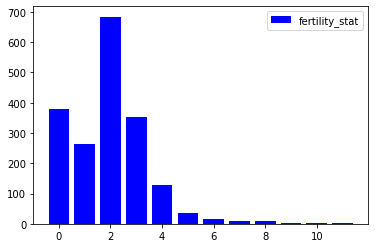

In [15]:
pylab.bar(range(12), np.bincount(data), color = 'b', label = 'fertility_stat')
pylab.legend()

In [16]:
l = np.mean(data)
l

1.93716719914803

 ## Критерий согласия

In [17]:
observed_frequences = np.bincount(data)
observed_frequences

array([379, 262, 684, 353, 128,  35,  16,   8,  10,   1,   1,   1],
      dtype=int64)

In [18]:
expected_frequences = [len(data)*stats.poisson.pmf(x, l) for x in range(min(data), max(data) + 1)]
expected_frequences

[270.6416065637888,
 524.2780429600978,
 507.80711402791167,
 327.9024282629646,
 158.80045713800124,
 61.52460735548975,
 19.863908551586047,
 5.49710172757265,
 1.3311006446292126,
 0.28650716750450117,
 0.055501228721053016,
 0.009774105435530582]

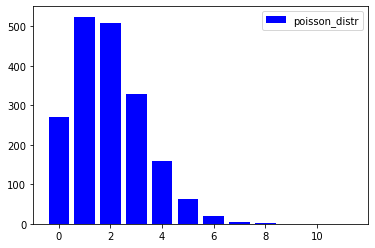

In [19]:
pylab.bar(range(len(expected_frequences)), expected_frequences, color = 'b', label = 'poisson_distr')
pylab.legend()

Статистика критерия хи-квадрат: $$\chi^2=\sum_{i=1}^K \frac{\left(n_i- np_i\right)^2}{np_i}$$
При справедливости нулевой гипотезы имеет распределение хи-квадрат с числом степеней свободы $K-1-m$, где $m$ - число параметров распределения, оцененных по выборке.

In [20]:
stats.chisquare(observed_frequences, expected_frequences, ddof = 1)

Power_divergenceResult(statistic=431.5752205284916, pvalue=1.772613180233512e-86)

По данным опроса, 75% работников ресторанов утверждают, что испытывают на работе существенный стресс, оказывающий негативное влияние на их личную жизнь. Крупная ресторанная сеть опрашивает 100 своих работников, чтобы выяснить, отличается ли уровень стресса работников в их ресторанах от среднего. 67 из 100 работников отметили высокий уровень стресса.

Посчитайте достигаемый уровень значимости, округлите ответ до четырёх знаков после десятичной точки.

In [21]:
n = 100
prob = 0.75
F_H0 = stats.binom(n, prob)

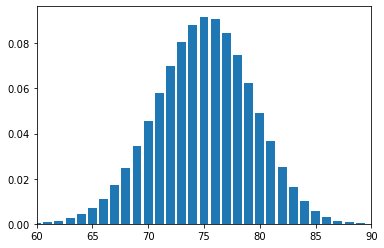

In [74]:
x = np.linspace(0,100,101)

pylab.bar(x, F_H0.pmf(x), align = 'center')
pylab.xlim(60, 90) 
pylab.show()

In [23]:
stats.binom_test(67, 100, prob)

0.08222258891386608

Представим теперь, что в другой ресторанной сети только 22 из 50 работников испытывают существенный стресс. Гипотеза о том, что 22/50 соответствует 75% по всей популяции, методом, который вы использовали в предыдущей задаче, отвергается. Чем это может объясняться?

In [24]:
stats.binom_test(22, 50, prob)

3.4831478978300243e-06

The Wage Tract — заповедник в округе Тома, Джорджия, США, деревья в котором не затронуты деятельностью человека со времён первых поселенцев. Для участка заповедника размером 200х200 м имеется информация о координатах сосен (sn — координата в направлении север-юг, we — в направлении запад-восток, обе от 0 до 200).

Проверим, можно ли пространственное распределение сосен считать равномерным, или они растут кластерами.

Загрузите данные, поделите участок на 5х5 одинаковых квадратов размера 40x40 м, посчитайте количество сосен в каждом квадрате (чтобы получить такой же результат, как у нас, используйте функцию scipy.stats.binned_statistic_2d).

Если сосны действительно растут равномерно, какое среднее ожидаемое количество сосен в каждом квадрате? В правильном ответе два знака после десятичной точки.

In [26]:
import pandas as pd

In [27]:
pines_data = pd.read_table('pines.txt')
pines_data.describe()
pines_data.head()

,sn,we
0,200.0,8.8
1,199.3,10.0
2,193.6,22.4
3,167.7,35.6
4,183.9,45.4


In [43]:
len(pines_data.we.values)

584

In [60]:
x = (pines_data.sn.values)

In [61]:
y = pines_data.we.values

In [66]:
sn_num, we_num = 5, 5

trees_bins = stats.binned_statistic_2d(x, y, values=x, statistic='count', bins=[sn_num,we_num])

In [70]:
squares_num = trees_bins.statistic

In [71]:
np.sum(squares_num) / 25

23.36

In [79]:
stats.chisquare(squares_num.flatten(), ddof=0)

Power_divergenceResult(statistic=150.58904109589042, pvalue=2.574669774967279e-20)